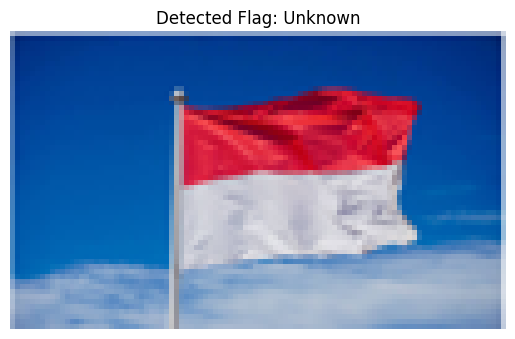

The detected flag is: Unknown


In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def detect_flag(image_path):
    # Load the image
    image = Image.open(image_path)
    image = image.resize((100, 60))  # Resize for simplicity
    
    # Convert to NumPy array
    img_array = np.array(image)
    
    # Calculate the midline to divide into top and bottom halves
    midline = img_array.shape[0] // 2
    top_half = img_array[:midline, :, :]
    bottom_half = img_array[midline:, :, :]
    
    # Find dominant colors (mean of RGB values)
    top_color = np.mean(top_half, axis=(0, 1))  # RGB mean of top half
    bottom_color = np.mean(bottom_half, axis=(0, 1))  # RGB mean of bottom half
    
    # Normalize colors to range 0-1
    top_color /= 255.0
    bottom_color /= 255.0
    
    # Determine if the flag is Indonesia or Poland
    if np.all(top_color > bottom_color):  # Top red, bottom white
        flag = "Indonesia"
    elif np.all(bottom_color > top_color):  # Top white, bottom red
        flag = "Poland"
    else:
        flag = "Unknown"
    
    # Show the image with the result
    plt.imshow(image)
    plt.title(f"Detected Flag: {flag}")
    plt.axis('off')
    plt.show()
    
    return flag

# Test the function with the uploaded image
flag_result = detect_flag(r"C:\Users\Vibha Narayan\OneDrive\Pictures\Screenshots\Screenshot 2024-12-18 215428.png")
print(f"The detected flag is: {flag_result}")


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def detect_flag_with_object_detection(image_path):
    # Load the image
    image = Image.open(image_path)
    img_array = np.array(image)

    # Convert the image to grayscale-like by detecting dominant red and white pixels
    red_channel = img_array[:, :, 0]  # Red channel
    white_channel = np.mean(img_array, axis=2)  # Average across R, G, B for white intensity
    
    # Threshold for detecting red and white regions
    red_mask = red_channel > 150  # Red intensity threshold
    white_mask = (white_channel > 180) & (red_channel < 150)  # Bright and non-red
    
    # Find the top and bottom half dominant colors
    midline = img_array.shape[0] // 2
    top_red_pixels = np.sum(red_mask[:midline])
    top_white_pixels = np.sum(white_mask[:midline])
    bottom_red_pixels = np.sum(red_mask[midline:])
    bottom_white_pixels = np.sum(white_mask[midline:])
    
    # Determine if the flag is Indonesia or Poland
    if top_red_pixels > top_white_pixels and bottom_white_pixels > bottom_red_pixels:
        flag = "Indonesia"
    elif top_white_pixels > top_red_pixels and bottom_red_pixels > bottom_white_pixels:
        flag = "Poland"
    else:
        flag = "Unknown"

    # Visualization: Mark the detected regions and show the image
    detected_regions = np.zeros_like(img_array)
    detected_regions[red_mask] = [255, 0, 0]  # Highlight red regions
    detected_regions[white_mask] = [255, 255, 255]  # Highlight white regions

    # Plot original and detected regions
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(detected_regions)
    plt.title(f"Detected Flag: {flag}")
    plt.axis('off')

    plt.show()
    return flag

# Test the function with the uploaded image
flag_result = detect_flag_with_object_detection(r"C:\Users\Vibha Narayan\OneDrive\Pictures\Screenshots\Screenshot 2024-12-18 215428.png")
print(f"The detected flag is: {flag_result}")
